In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("adult.csv")

In [3]:
df.columns

Index(['39', ' State-gov', '77516', ' Bachelors', '13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', '2174', '0', '40',
       ' United-States', ' <=50K'],
      dtype='object')

In [4]:
col_Names = ['Age','WorkClass','fnlwgt','Education','Education_num','Marital_Status','Occupation','Relationship',
            'Race','Sex','Cap_Gain','Cap_Loss','Hrs_Per_Week','Country','Target' ]
## 1 Renaming the columns

In [5]:
df.rename(columns=dict(zip(df.columns,col_Names)),inplace=True)

In [6]:
df.shape

(32560, 15)

In [7]:
d = {'Mean_hr':df.groupby("Country").mean()['Hrs_Per_Week'],'Min_hr':df.groupby("Country").min()['Hrs_Per_Week'],'Max_hr':df.groupby("Country").max()['Hrs_Per_Week']}

In [8]:
MMM_df = pd.DataFrame(data=d,columns=['Mean_hr', 'Min_hr','Max_hr'])

In [9]:
MMM_df.head()

## 2 This Dataframe Gives the Min , Max and Mean of all the Countries. I am just displaying the head here. 
##   You may remove the head and will get the entire dataframe containing all the countries.

,Mean_hr,Min_hr,Max_hr
Country,,,
Cambodia,40.894737,40,50
Canada,40.404959,8,72
China,37.786667,1,60
Columbia,39.067797,5,60
Cuba,39.157895,5,70


In [10]:
a = df[df['Country']==' United-States']
b = a[a['Age']>40]
b[b['Education']==' Bachelors']['Target'].count()
## 3 In my final query I have just taken one of the columns and counted the rows. The same can be acheved by 
## providing df.shape, this would give us the number of rows*columns. Here the first arg will tell us the rows. 

1943

In [11]:
a = df[df['Sex']==" Male"]
a["Age"].mean()

# 4  Mean age of all males is 39.43

39.433567396392675

In [12]:
## Here I would take the Education Num as the variable to account for the maximum education achieved. 
df['Education_num'].max()

16

In [13]:
## 5 To start with the maximum education number is 16 hence we start by taking that as the intial hypothesis. 
a = df[df['Education_num']==16]
a = a.groupby("Occupation").count()
a.sort_values(by = 'Age',ascending=False)[:3]

## So the Maximum Rated Occupation is listed below. 

,Age,WorkClass,fnlwgt,Education,Education_num,Marital_Status,Relationship,Race,Sex,Cap_Gain,Cap_Loss,Hrs_Per_Week,Country,Target
Occupation,,,,,,,,,,,,,,
Prof-specialty,321,321,321,321,321,321,321,321,321,321,321,321,302,321
Exec-managerial,55,55,55,55,55,55,55,55,55,55,55,55,54,55
Sales,8,8,8,8,8,8,8,8,8,8,8,8,8,8


In [14]:
a = []
for i in df['Education_num']:
    if i>9:
        a.append('HighlyQualified')
    else:
        a.append('OtherQualified')
df['category'] = a
df

,Age,WorkClass,fnlwgt,Education,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Cap_Gain,Cap_Loss,Hrs_Per_Week,Country,Target,category
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,HighlyQualified
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,OtherQualified
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,OtherQualified
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,HighlyQualified
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,HighlyQualified
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,OtherQualified
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,OtherQualified
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,HighlyQualified
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,HighlyQualified
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K,HighlyQualified


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B082B1AC88>]],
      dtype=object)

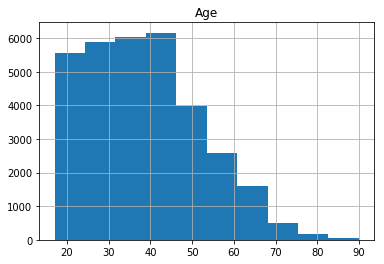

In [15]:
df.hist(column='Age')

## We see that a majority of the population is Working in the age of 18-50 Yeas and we see a steep decline as we 
## approach the rear end of the graph i.e that there arent many people who work after the age of 70 years. 

In [16]:
## Missing Values Analysis

In [17]:
for i in df.columns:
    print('Missing Values in',i ,'is :', df[i].isna().sum())

Missing Values in Age is : 0
Missing Values in WorkClass is : 1836
Missing Values in fnlwgt is : 0
Missing Values in Education is : 0
Missing Values in Education_num is : 0
Missing Values in Marital_Status is : 0
Missing Values in Occupation is : 1843
Missing Values in Relationship is : 0
Missing Values in Race is : 0
Missing Values in Sex is : 0
Missing Values in Cap_Gain is : 0
Missing Values in Cap_Loss is : 0
Missing Values in Hrs_Per_Week is : 0
Missing Values in Country is : 583
Missing Values in Target is : 0
Missing Values in category is : 0


In [18]:
df['Country'].mode() ## Mode of the dataframe

0     United-States
dtype: object

In [19]:
newdf1 = df['Country'].fillna('  United-States',inplace = True)

In [20]:
## No More Missing values
df[df['Country']=="NAN"]

,Age,WorkClass,fnlwgt,Education,Education_num,Marital_Status,Occupation,Relationship,Race,Sex,Cap_Gain,Cap_Loss,Hrs_Per_Week,Country,Target,category


In [21]:
df.dropna(subset=['WorkClass','Occupation'],inplace= True)

## From Above Summary of our missing Values we have already checked that the Missing Values are 1836 and total are 
## 32560 so we should be left with 30724. We have those values at the base. 
## Again here there are 1843 missing values so we should have = 32560-1843 = 30717. We can check this at the bottom.

In [22]:
df.shape

## Again here there are 1843 missing values so we should have = 32560-1843 = 30717. We can check this at the bottom.

(30717, 16)

In [23]:
for i in df.columns:
    print('Missing Values in',i ,'is :', df[i].isna().sum())

Missing Values in Age is : 0
Missing Values in WorkClass is : 0
Missing Values in fnlwgt is : 0
Missing Values in Education is : 0
Missing Values in Education_num is : 0
Missing Values in Marital_Status is : 0
Missing Values in Occupation is : 0
Missing Values in Relationship is : 0
Missing Values in Race is : 0
Missing Values in Sex is : 0
Missing Values in Cap_Gain is : 0
Missing Values in Cap_Loss is : 0
Missing Values in Hrs_Per_Week is : 0
Missing Values in Country is : 0
Missing Values in Target is : 0
Missing Values in category is : 0
